<a href="https://colab.research.google.com/github/Rvze/ML/blob/main/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn == 0.23.0

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import cv2, os
from imutils import paths


In [ ]:
def extract_histogram(img, bins=(8, 8, 8)):
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
!unzip -o -q train_task.zip
!unzip -o -q test_task.zip

In [ ]:
imagePaths = sorted(list(paths.list_images('train')))

In [ ]:
data = []
labels = []
for (i, path) in enumerate(imagePaths):
    image = cv2.imread(path)
    label = path.split(os.path.sep)[-1].split('.')[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Responses: Cat = 1, Dog = 0

In [ ]:
Y_response = [1 if label == 'cat' else 0 for label in labels]

Support Vector Machine

In [ ]:
svm = LinearSVC(C=1.32, random_state=238)
svm.fit(data, Y_response)

LinearSVC(C=1.32, random_state=238)

Бэггинг деревьев принятия решений

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, max_leaf_nodes=20, random_state=238)
bagging = BaggingClassifier(tree,n_estimators=11, random_state=238)
bagging.fit(data, Y_response)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=238),
                  n_estimators=11, random_state=238)

Random tree

In [ ]:
forest = RandomForestClassifier(n_estimators=11, criterion="entropy", min_samples_leaf=10, max_leaf_nodes=20, random_state=238)
forest.fit(data,Y_response)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=11, random_state=238)

Logistic regression

In [ ]:
log = LogisticRegression(solver="lbfgs", random_state=238)

In [ ]:
estimators = [('SVM', svm), ('Bagging DecisionTree', bagging), ('DesicionForest', forest)]
stacking = StackingClassifier(estimators=estimators, final_estimator=log, cv=2)
stacking.fit(data, Y_response)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.32, random_state=238)),
                               ('Bagging DecisionTree',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=238),
                                                  n_estimators=11,
                                                  random_state=238)),
                               ('DesicionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=1

In [ ]:
stacking.score(data,Y_response)

0.839

In [ ]:
from IPython.display import Image

In [ ]:
def predict(file_name):
    singleImage = cv2.imread(file_name)
    prediction = stacking.predict(extract_histogram(singleImage).reshape(1, -1))
    display(Image(filename= file_name))
    print(f"Ans = {prediction[0]}")
    print(f"Ans = {stacking.predict_proba(extract_histogram(singleImage).reshape(1, -1))}")


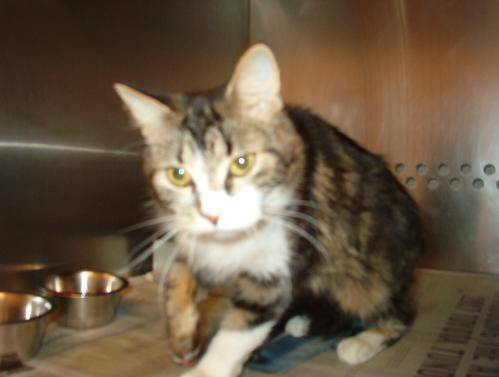

Ans = 1
Ans = [[0.45640977 0.54359023]]


In [ ]:
predict("test/cat.1015.jpg")

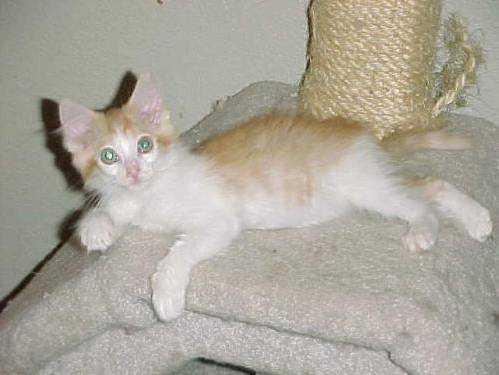

Ans = 1
Ans = [[0.33170739 0.66829261]]


In [ ]:
predict("test/cat.1006.jpg")

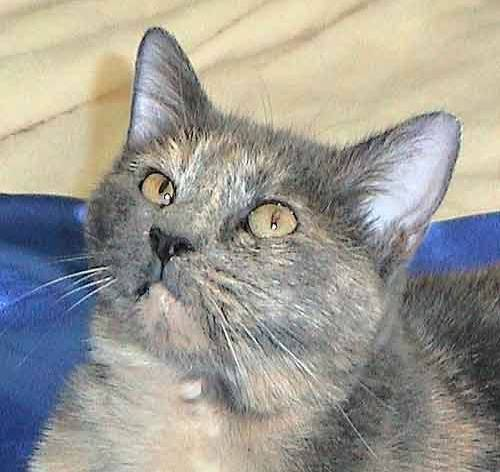

Ans = 1
Ans = [[0.43188484 0.56811516]]


In [ ]:
predict("test/cat.1022.jpg")

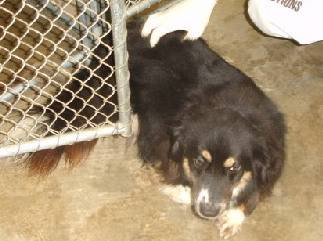

Ans = 1
Ans = [[0.36691222 0.63308778]]


In [ ]:
predict("test/dog.1007.jpg")